<a href="https://colab.research.google.com/github/nancynewlin-masi/ConnectomeSpecial/blob/main/TransformersTurotorial_pretrainedCLIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from PIL import Image
import requests

from transformers import CLIPProcessor, CLIPModel


In [25]:

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

#url = "http://images.cocodataset.org/val2017/000000039769.jpg"
url = "https://www.thesprucepets.com/thmb/70j7KVSjSDv2kyOi3tIp_pA0ISo=/4730x3154/filters:no_upscale():max_bytes(150000):strip_icc()/yorkshire-terrier-583788122-581630e85f9b581c0b018a00.jpg"

image = Image.open(requests.get(url, stream=True).raw)



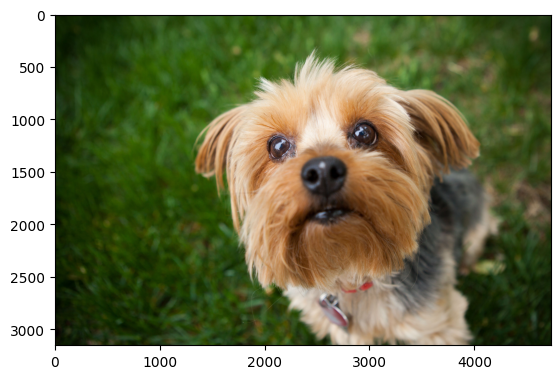

In [26]:
import matplotlib.pyplot as plt

plt.imshow(image)
plt.show() # image will not be displayed without this

In [27]:

inputs = processor(text=["a photo of a cat", "a photo of a dog", "a photo of multiple cats", "small furry animal"], images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities

In [29]:
import numpy as np
print(logits_per_image)
print(probs.detach().numpy()[0])
classprobabilities=probs.detach().numpy()[0]
print(sum(classprobabilities))
options=["a photo of a cat", "a photo of a dog", "a photo of multiple cats", "small furry animal"]
print(options[np.argmax(classprobabilities)])

tensor([[20.7352, 27.1987, 15.0304, 23.7809]], grad_fn=<TBackward0>)
[1.5074463e-03 9.6679336e-01 5.0201961e-06 3.1694096e-02]
0.9999999203901098
a photo of a dog
